# Project 2 - Breast Cancer Recurrence Predictor

## Part 1

In [527]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [528]:
bc = pd.read_csv('project2.csv')
bc

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [529]:
print('The shape of the dataset is', bc.shape)
print('The size of the dataset is', bc.size)

The shape of the dataset is (286, 10)
The size of the dataset is 2860


In [530]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Now, we will check for duplicated entries and delete all of them:

In [531]:
bc.duplicated().sum()

14

In [532]:
bc.drop_duplicates(inplace=True, ignore_index=True)
bc.duplicated().sum()

0

We will now take a deeper look into each variable to see the unique values and potential null or missing values.

In [533]:
print('class\n')
print('Unique values:', bc['class'].unique())
print('Null values:', bc['class'].isnull().sum())
print('Missing values:', len(bc[bc['class'] == '?']))

class

Unique values: ['no-recurrence-events' 'recurrence-events']
Null values: 0
Missing values: 0


In [534]:
print('age\n')
print('Unique values:', bc['age'].unique())
print('Null values:', bc['age'].isnull().sum())
print('Missing values:', len(bc[bc['age'] == '?']))

age

Unique values: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Null values: 0
Missing values: 0


In [535]:
print('menopause\n')
print('Unique values:', bc['menopause'].unique())
print('Null values:', bc['menopause'].isnull().sum())
print('Missing values:', len(bc[bc['menopause'] == '?']))

menopause

Unique values: ['premeno' 'ge40' 'lt40']
Null values: 0
Missing values: 0


In [536]:
print('tumor-size\n')
print('Unique values:', bc['tumor-size'].unique())
print('Null values:', bc['tumor-size'].isnull().sum())
print('Missing values:', len(bc[bc['tumor-size'] == '?']))

tumor-size

Unique values: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Null values: 0
Missing values: 0


In [537]:
print('inv-nodes\n')
print('Unique values:', bc['inv-nodes'].unique())
print('Null values:', bc['inv-nodes'].isnull().sum())
print('Missing values:', len(bc[bc['inv-nodes'] == '?']))

inv-nodes

Unique values: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Null values: 0
Missing values: 0


In [538]:
print('node-caps\n')
print('Unique values:', bc['node-caps'].unique())
print('Null values:', bc['node-caps'].isnull().sum())
print('Missing values:', len(bc[bc['node-caps'] == '?']))

node-caps

Unique values: ['no' 'yes' '?']
Null values: 0
Missing values: 8


In [539]:
print('deg-malig\n')
print('Unique values:', bc['deg-malig'].unique())
print('Null values:', bc['deg-malig'].isnull().sum())
print('Missing values:', len(bc[bc['deg-malig'] == '?']))

deg-malig

Unique values: [3 2 1]
Null values: 0
Missing values: 0


In [540]:
print('breast\n')
print('Unique values:', bc['breast'].unique())
print('Null values:', bc['breast'].isnull().sum())
print('Missing values:', len(bc[bc['breast'] == '?']))

breast

Unique values: ['left' 'right']
Null values: 0
Missing values: 0


In [541]:
print('breast-quad\n')
print('Unique values:', bc['breast-quad'].unique())
print('Null values:', bc['breast-quad'].isnull().sum())
print('Missing values:', len(bc[bc['breast-quad'] == '?']))

breast-quad

Unique values: ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Null values: 0
Missing values: 1


In [542]:
print('irradiat\n')
print('Unique values:', bc['irradiat'].unique())
print('Null values:', bc['irradiat'].isnull().sum())
print('Missing values:', len(bc[bc['irradiat'] == '?']))

irradiat

Unique values: ['no' 'yes']
Null values: 0
Missing values: 0


There are no null values in the data, but some entries in `node-caps` and `breast-quad` have missing values, denoted by `?`. We will replace the missing values with the most common occurrence, or the mode, since these variables are not numerical and can't be replaced with the mean or median. Ideally, the values of `age`, `inv-nodes`, and `tumor-size` can be converted into integer ranges, but that is a bit more challenging.

In [543]:
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])

print('Missing values for node-caps:', len(bc[bc['node-caps'] == '?']))
print('Missing values for breast-quad:', len(bc[bc['breast-quad'] == '?']))

Missing values for node-caps: 0
Missing values for breast-quad: 0


We see that these two categories now have no missing values.

Let's visualize the data using univariate analysis:

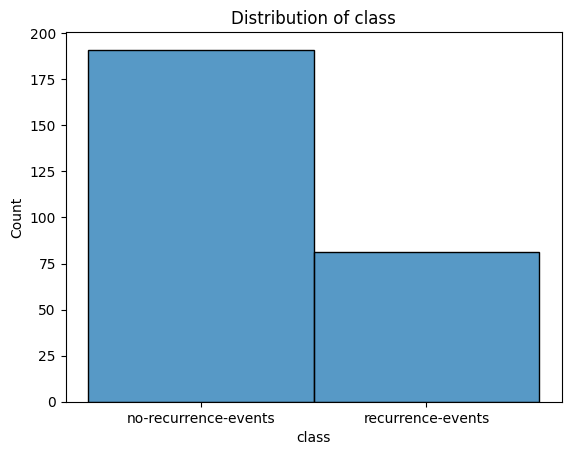

In [544]:
sns.histplot(data=bc, x='class')
plt.title('Distribution of class')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

The variable `class` only has two unique values: `no-recurrence-events` and `recurrence-events`. As seen in the histogram, there is not an even distribution, as `no-recurrence-events` is the clear mode.

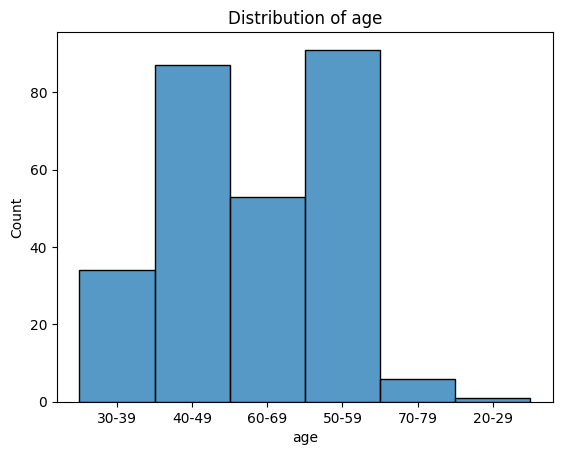

In [545]:
sns.histplot(data=bc, x='age')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

The variable `age` exhibits values that are number ranges, which are more traditional to histograms. However, due to the datatype of the values, they are not ordered, so the x-axis is not either. If ordered, the graph would show a unimodal peak at around 50-59 years old with a bit of a left skew.

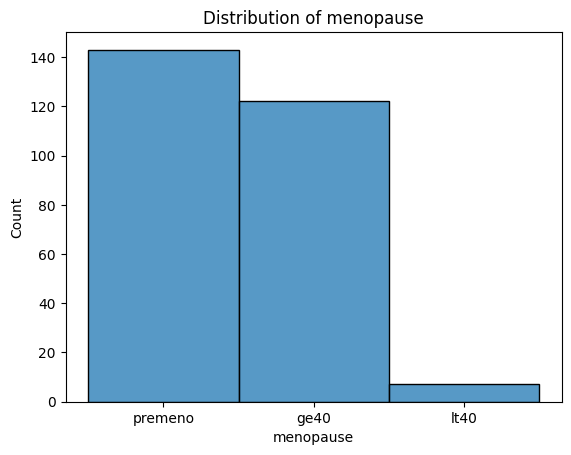

In [546]:
sns.histplot(data=bc, x='menopause')
plt.title('Distribution of menopause')
plt.xlabel('menopause')
plt.ylabel('Count')
plt.show()

The variable `menopause` is a categorical variable that has three unique values: `premeno`, `ge40`, and `lt40`. While `premeno` and `ge40` have similar frequencies, that of `lt40` is significantly less.

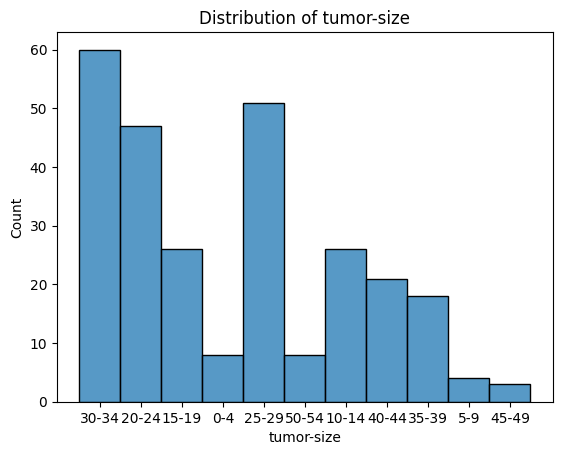

In [547]:
sns.histplot(data=bc, x='tumor-size')
plt.title('Distribution of tumor-size')
plt.xlabel('tumor-size')
plt.ylabel('Count')
plt.show()

Similar to `age`, `tumor-size` has values as ranges that are not ordered along the x-axis. If orderedm there would be a unimodal peak at 30-34 (units unclear), and the distribution would appear fairly normal.

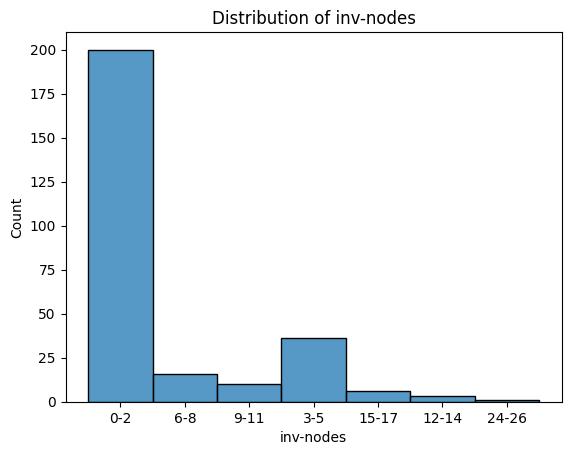

In [548]:
sns.histplot(data=bc, x='inv-nodes')
plt.title('Distribution of inv-nodes')
plt.xlabel('inv-nodes')
plt.ylabel('Count')
plt.show()

The histogram of `inv-nodes` exhibits an extreme right skew and has a mode of 0-2.

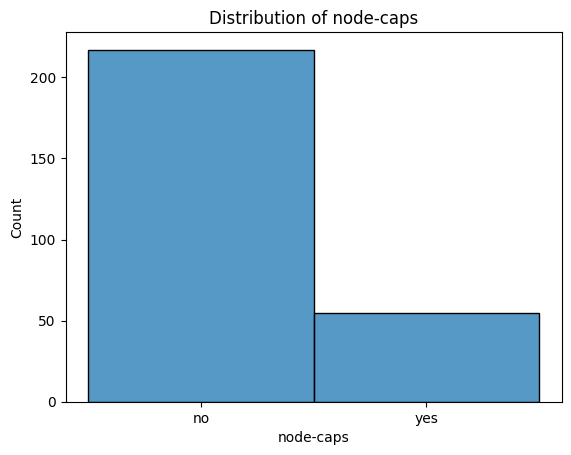

In [549]:
sns.histplot(data=bc, x='node-caps')
plt.title('Distribution of node-caps')
plt.xlabel('node-caps')
plt.ylabel('Count')
plt.show()

The variable `node-caps` only has two unique values of yes and no. A large majority of the entries (over 200) have a `node-caps` value of no.

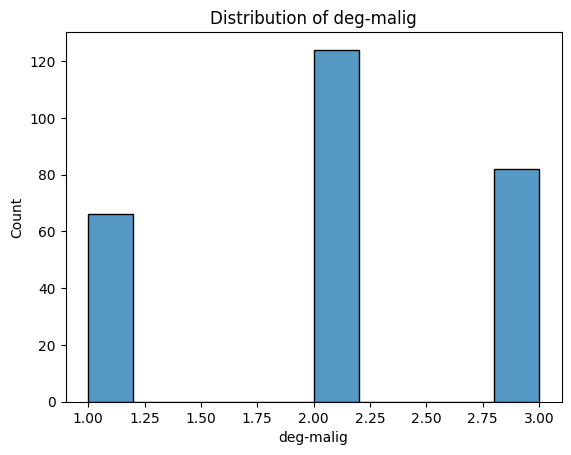

In [550]:
sns.histplot(data=bc, x='deg-malig')
plt.title('Distribution of deg-malig')
plt.xlabel('deg-malig')
plt.ylabel('Count')
plt.show()

The variable `deg-malig` was the only variable to originally have type `int`. As a result, there are only 3 unique values: 1, 2, and 3. While all 3 degrees have a frequency of over 60. There is a clear mode at 2 degrees, followed by 3, then 1.

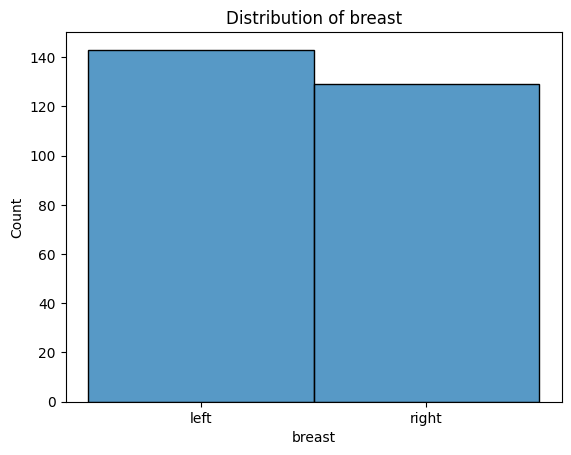

In [551]:
sns.histplot(data=bc, x='breast')
plt.title('Distribution of breast')
plt.xlabel('breast')
plt.ylabel('Count')
plt.show()

The variable `breast` denotes the origin of tumor in a specific breast. As expected, the distribution is almost even, although the value `left` is the mode.

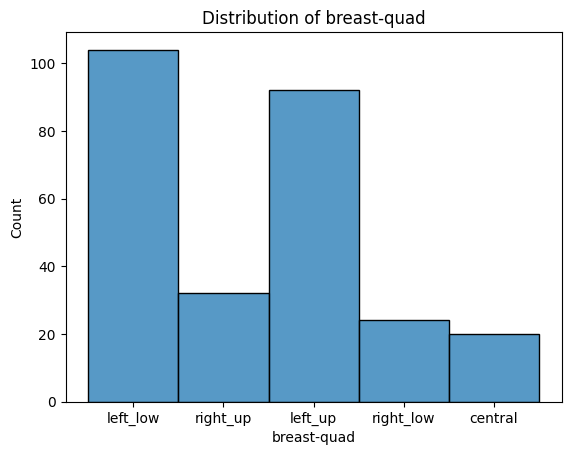

In [552]:
sns.histplot(data=bc, x='breast-quad')
plt.title('Distribution of breast-quad')
plt.xlabel('breast-quad')
plt.ylabel('Count')
plt.show()

The variable `breast-quad` describes the quadrant that the tumor is located in. There are five unique values: `left_up`, `left_low`, `right_up`, `right_low`, and `central`. There appears to be a vast mode for the left side, as `left_up` and `left_low` exhibit frequencies of over 90.

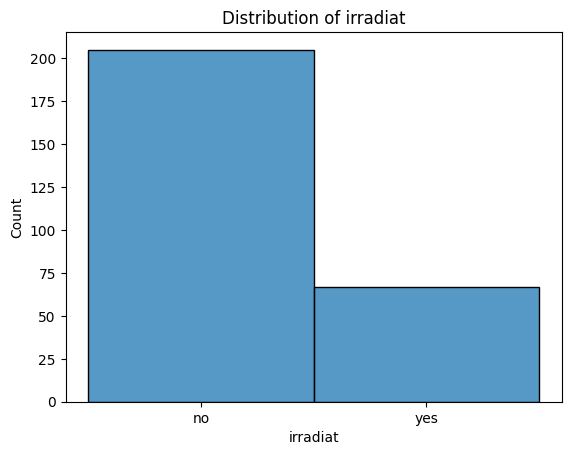

In [553]:
sns.histplot(data=bc, x='irradiat')
plt.title('Distribution of irradiat')
plt.xlabel('irradiat')
plt.ylabel('Count')
plt.show()

The variable `irradiat` only has two unique values of yes and no. A large majority of the entries (over 200) have a `irradiat` value of no.

Next, a one-hot encoding will be performed on all categorical variables, which are `class`, `age`, `menopause`, `tumor-size`, `inv-nodes`, `node-caps`, `breast`, `breast-quad`, and `irradiat`. 

In [554]:
bc = pd.get_dummies(bc, columns=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
bc

,deg-malig,class_recurrence-events,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,...,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
268,3,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
269,1,True,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
270,3,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Part 2

In [555]:
import sklearn

X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']

The data is split into training and test sets:

In [556]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### K-Nearest Neighbor Classifier

In [557]:
from sklearn import neighbors, model_selection, metrics

param_grid = {"n_neighbors": np.arange(1, 100)}

knn_search_accuracy = neighbors.KNeighborsClassifier()

knn_gscv = model_selection.GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

knn_model = knn_gscv.best_estimator_

print("Best parameters:", knn_gscv.best_params_)
print("Best score:", knn_gscv.best_score_)

print(f"Performance on TEST\n*******************\n{metrics.classification_report(y_test, knn_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{metrics.classification_report(y_train, knn_model.predict(X_train))}")

Best parameters: {'n_neighbors': 18}
Best score: 0.7157894736842105
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.72      1.00      0.84        59
        True       0.00      0.00      0.00        23

    accuracy                           0.72        82
   macro avg       0.36      0.50      0.42        82
weighted avg       0.52      0.72      0.60        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.71      1.00      0.83       132
        True       1.00      0.07      0.13        58

    accuracy                           0.72       190
   macro avg       0.85      0.53      0.48       190
weighted avg       0.80      0.72      0.62       190



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [558]:
from sklearn import linear_model, metrics

model = linear_model.LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)

print(f"Performance on TEST\n*******************\n{metrics.classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{metrics.classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.73      0.88      0.80        59
        True       0.36      0.17      0.24        23

    accuracy                           0.68        82
   macro avg       0.55      0.53      0.52        82
weighted avg       0.63      0.68      0.64        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.76      0.92      0.83       132
        True       0.63      0.33      0.43        58

    accuracy                           0.74       190
   macro avg       0.69      0.62      0.63       190
weighted avg       0.72      0.74      0.71       190



### Naive Bayes

In [559]:
from sklearn import naive_bayes, metrics

gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)

print(f"Performance on TEST\n*******************\n{metrics.classification_report(y_test, gnb.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{metrics.classification_report(y_train, gnb.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.92      0.20      0.33        59
        True       0.32      0.96      0.48        23

    accuracy                           0.41        82
   macro avg       0.62      0.58      0.41        82
weighted avg       0.75      0.41      0.37        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.20      0.34       132
        True       0.36      1.00      0.52        58

    accuracy                           0.45       190
   macro avg       0.68      0.60      0.43       190
weighted avg       0.80      0.45      0.40       190

